# Skincare Sifarish : A Data-Driven Approach to Skincare

### MOTIVATION
Ever felt overwhelmed by the countless skincare products vying for your attention? It's a common dilemma – products promising the world, but which ones are right for you? The surprising part is that the answers are right there on the back of each product: the list of ingredients. But let's face it, decoding those lists can be like trying to crack a secret code, especially if you're not a chemistry whiz. But fear not, because knowledge is indeed power, and this is where data science steps in to lend a helping hand. In this project, we're diving into the exciting world of data science and skincare. Think of it as your skincare sidekick. By using fancy technology and smart calculations, we're taking the confusion out of ingredients. Our mission? To give you the tools to confidently pick the perfect skincare match for your unique needs

In [1]:
# basic libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

# installing UMAP

!pip install umap-learn

import umap
import numba

# Euclidean distance

from math import dist


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# importing the data

cosmeticsdf = pd.read_csv('cosmetics.csv')
cosmeticsdf

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


## Dataset
This dataset comprises 1472 product entries, each featuring a range of informative columns:

1. Label - Product category
2. Brand - Manufacturer of the product
3. Name - Product name
4. Price - Product cost
5. Rank - Consumer-assigned product rating, ranging from 0 to 5
6. Ingredients - Collection of words detailing the product's components
7. Subsequent columns - Indicate product compatibility with various skin types. A value of 1 signifies suitability, while 0 denotes incompatibility.


-------------------------------------------------------------------------------------------------------------------------------

## CLEANING THE DATASET
### Removing rows of missing information
The original dataset retrieved from Kaggle contains rows of data with missing information about the ingredients and so we had to remove them. 

In [3]:
# removing rows without ingredients

cosmeticsdf = cosmeticsdf[cosmeticsdf["Ingredients"].str.contains("Visit") == False]
cosmeticsdf = cosmeticsdf[cosmeticsdf["Ingredients"].str.contains("No Info") == False]
cosmeticsdf = cosmeticsdf[cosmeticsdf["Ingredients"].str.contains("NAME") == False]
cosmeticsdf = cosmeticsdf[cosmeticsdf["Ingredients"].str.contains("product package") == False]
cosmeticsdf

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0


### Changing the Indexing
Changed the numerical indexes of the dataset to the name of the products, which makes it easier to locate the product we want subsequently. 

In [4]:
# changing the indexes to the names of the products

cosmeticsdf = cosmeticsdf.set_index('Name')
cosmeticsdf

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
Name,,,,,,,,,,
Crème de la Mer,Moisturizer,LA MER,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
Facial Treatment Essence,Moisturizer,SK-II,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
Protini™ Polypeptide Cream,Moisturizer,DRUNK ELEPHANT,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
The Moisturizing Soft Cream,Moisturizer,LA MER,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
Your Skin But Better™ CC+™ Cream with SPF 50+,Moisturizer,IT COSMETICS,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
Daily Deflector™ Moisturizer Broad Spectrum SPF 50+,Sun protect,KATE SOMERVILLE,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
Yoghurt Nourishing Fluid Veil Face Sunscreen Broad Spectrum SPF 30,Sun protect,KORRES,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
Daily Deflector™ Waterlight Broad Spectrum SPF 50+ PA+++ Anti-Aging Sunscreen,Sun protect,KATE SOMERVILLE,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0


### Observing the categories of the various products

In [5]:
# finding the number of products for each brand

print(cosmeticsdf["Brand"].value_counts())

CLINIQUE              71
SHISEIDO              49
PETER THOMAS ROTH     46
MURAD                 46
SEPHORA COLLECTION    45
                      ..
TOO FACED              1
MAKE UP FOR EVER       1
NURSE JAMIE            1
SON & PARK             1
URBAN DECAY            1
Name: Brand, Length: 110, dtype: int64


In [6]:
# finding the number of categories

print(cosmeticsdf["Label"].value_counts())

Moisturizer    262
Cleanser       238
Face Mask      238
Treatment      222
Eye cream      174
Sun protect    150
Name: Label, dtype: int64


We find out that there are 6 different categories of skincare products: 

1. Moisturizer
2. Face Mask
3. Cleanser
4. Treatment
5. Eye Cream
6. Sun Protect

As the entire dataset consists of products of six different categories, we believed that it was essential for us to split them up into six separate datasets to obtain reliable results, as it would be unfair to compare products that serve different purposes. 

In [7]:
cosmeticsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, Crème de la Mer to Pro Light Self Tan Bronzing Mist
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1284 non-null   object 
 1   Brand        1284 non-null   object 
 2   Price        1284 non-null   int64  
 3   Rank         1284 non-null   float64
 4   Ingredients  1284 non-null   object 
 5   Combination  1284 non-null   int64  
 6   Dry          1284 non-null   int64  
 7   Normal       1284 non-null   int64  
 8   Oily         1284 non-null   int64  
 9   Sensitive    1284 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 110.3+ KB


In [8]:
# splitting the dataset into the 6 different categories

moisturizer = cosmeticsdf[cosmeticsdf["Label"].str.contains("Moisturizer") == True]
facemask = cosmeticsdf[cosmeticsdf["Label"].str.contains("Face Mask") == True]
cleanser = cosmeticsdf[cosmeticsdf["Label"].str.contains("Cleanser") == True]
treatment = cosmeticsdf[cosmeticsdf["Label"].str.contains("Treatment") == True]
eyecream = cosmeticsdf[cosmeticsdf["Label"].str.contains("Eye cream") == True]
sunprotect = cosmeticsdf[cosmeticsdf["Label"].str.contains("Sun protect") == True]

### Generating WordCloud for Visualization

In [9]:
cleanser_df = cosmeticsdf[cosmeticsdf.Label == 'Cleanser']
treatment_df = cosmeticsdf[cosmeticsdf.Label == 'Treatment']
moisturizer_df = cosmeticsdf[cosmeticsdf.Label == 'Moisturizer']
eyecream_df = cosmeticsdf[cosmeticsdf.Label == 'Eyecream']
facemask_df = cosmeticsdf[cosmeticsdf.Label == 'Face Mask']
sunprotect_df = cosmeticsdf[cosmeticsdf.Label == 'Sun protect']

In [10]:
cleanser = " ".join(ing for ing in cleanser_df.Ingredients)
facemask = " ".join(ing for ing in facemask_df.Ingredients)
treatment = " ".join(ing for ing in treatment_df.Ingredients)
eyecream = " ".join(ing for ing in eyecream_df.Ingredients)
moisturizer = " ".join(ing for ing in moisturizer_df.Ingredients)
sunprotect= " ".join(ing for ing in sunprotect_df.Ingredients)

In [11]:
!pip3 install wordcloud


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product'])

In [14]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

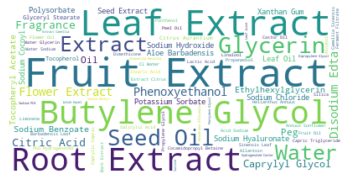

In [15]:
generate_wordcloud(cleanser)

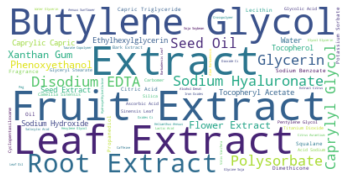

In [16]:
generate_wordcloud(treatment)

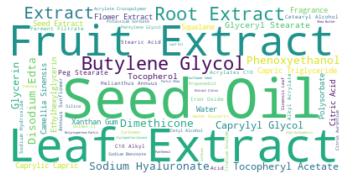

In [17]:
generate_wordcloud(moisturizer)

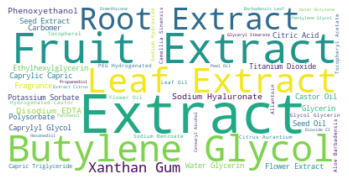

In [18]:
generate_wordcloud(facemask)

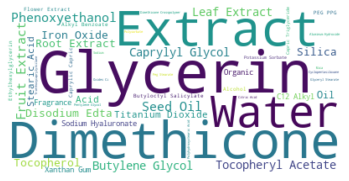

In [19]:
generate_wordcloud(sunprotect)

### RECOMMENDING PRODUCTS BASED ON SIMILAR INGREDIENTS

When we're on the hunt for new skincare goodies, it's easy to feel unsure about which ones to try. Often, we rely on what others suggest. But here's the thing: everyone's skin is different. What works wonders for someone else might not be the right fit for you. That's why we've come up with a clever idea – a recommendation system that looks at the stuff inside each product.

We're checking out the ingredients in skincare items to find ones that are really similar to our favorites – the ones that already make our skin happy. Our goal? To help you pick out products that suit your unique skin type like a charm.

We made use of natural language processing and dimensionality reduction techniques to analyse the similarities between ingredients used, since they are text data.

### Focus on one product category and one skin type

Since the dataset includes data which shows the products that are suitable for each skin type, 
we can take advantage of that to make our recommendation system more accurate by narrowing down the scope. 
In this explanation, we will be exploring just one combination as an example: Moisturizers for dry skin. 

In [20]:
# filtering out data that are moisturizers for dry skin

moisturizers_subset = cosmeticsdf[cosmeticsdf['Label'] == 'Moisturizer'][cosmeticsdf['Dry'] == 1]
moisturizers_subset

<ipython-input-20-5b6109082ab0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moisturizers_subset = cosmeticsdf[cosmeticsdf['Label'] == 'Moisturizer'][cosmeticsdf['Dry'] == 1]


,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
Name,,,,,,,,,,
Crème de la Mer,Moisturizer,LA MER,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
Facial Treatment Essence,Moisturizer,SK-II,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
Protini™ Polypeptide Cream,Moisturizer,DRUNK ELEPHANT,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
The Moisturizing Soft Cream,Moisturizer,LA MER,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
Your Skin But Better™ CC+™ Cream with SPF 50+,Moisturizer,IT COSMETICS,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
Ultra Facial Deep Moisture Balm,Moisturizer,KIEHL'S SINCE 1851,29,4.7,"Water, Glycerin, Shea Butter, Glyceryl Stearat...",0,1,1,0,0
White Lucent All Day Brightener Broad Spectrum SPF 23 Moisturizer,Moisturizer,SHISEIDO,62,4.6,"Water, Sd Alcohol 40-B, Dimethicone, Dipropyle...",1,1,1,0,0
Featherweight Daily Moisturizing Cream,Moisturizer,SATURDAY SKIN,49,4.6,"Water, Butylene Glycol, Ethylhexyl Palmitate, ...",1,1,1,1,1


In [21]:
moisturizers_subset.head()

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
Name,,,,,,,,,,
Crème de la Mer,Moisturizer,LA MER,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
Facial Treatment Essence,Moisturizer,SK-II,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
Protini™ Polypeptide Cream,Moisturizer,DRUNK ELEPHANT,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
The Moisturizing Soft Cream,Moisturizer,LA MER,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
Your Skin But Better™ CC+™ Cream with SPF 50+,Moisturizer,IT COSMETICS,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


# Tokenizing the ingredients

To get to our end goal of comparing ingredients in each product, we first need to do some preprocessing tasks and bookkeeping of the actual words in each product's ingredients list. 

### Lexical Analysis (Tokenization)
Lexical Analysis, also known as Tokenization, is like turning a sentence into a list of separate words. In our case, we're dealing with a bunch of ingredients all written together in a long string. Tokenization helps us break down these ingredients into individual words or pieces.

So, when we do Lexical Analysis for skincare products, we're taking messy ingredient descriptions and turning them into a neat list of specific ingredients. This makes it easier for us to study and analyze these ingredients, helping us find patterns and similarities between different products.

In [22]:
# tokenisation of the ingredients list 

# Initialize dictionary, list, and initial index
ingredient_dict = {}
corpus = []

# Loop through each product in the dataset
for i in range(len(moisturizers_subset)):
    ingredients = moisturizers_subset['Ingredients'][i].lower()  # Get the ingredients and make them lowercase
    tokens = ingredients.split(', ')                  # Split ingredients into separate pieces
    
    # Add the list of ingredient pieces to the corpus
    corpus.append(tokens)
    
    # Loop through each ingredient piece
    for ingredient in tokens:
        if ingredient not in ingredient_dict:          # If ingredient is not in the dictionary
            ingredient_dict[ingredient] = len(ingredient_dict)  # Add ingredient to the dictionary with a unique index
            
# Check the result 
print("The index for decyl oleate is", ingredient_dict['decyl oleate'])

The index for decyl oleate is 25


# Initializing a document-term matrix (DTM)

The next step is making a document-term matrix (DTM). Here each cosmetic product will correspond to a document, and each chemical composition will correspond to a term. This means we can think of the matrix as a “cosmetic-ingredient” matrix.


In [23]:


# Get the number of items and tokens  
M = len(moisturizers_subset)           # number of products
N = len(ingredient_dict)               # number of ingredients

# Initialize a matrix with zeros
matrix = np.zeros(shape = (M, N))


In [24]:
matrix.shape

(170, 2167)

### One-hot Encoding
One-hot encoding is often used in deep learning to convert categorical data variables to numerical data for machines to process for learning. To facilitate this process, we create a matrix with the rows representing the products and the columns representing the ingredients. This function goes through each ingredient of every product sequentially and fills the matrix with either a zero or one, depending on whether the ingredient is present in the product. At the end, we obtain a matrix of ingredients and products.

In [25]:
# maxtrix that is filled with binary values 
# to check if ingredient is present or absent
# if present, it will be 1
# if absent, it will be 0

# filling up the matrix
# Define the one_hot_encoder function
def one_hot_encoder(tokens):
    x = np.zeros(N)
    
    for ingredient in tokens:
        # Get the index for each ingredient
        index = ingredient_dict[ingredient]
        x[index] = 1
    return x


In [26]:
# Make a document-term matrix
i = 0

for tokens in corpus:
    matrix[i, :] = one_hot_encoder(tokens)
    i += 1

In [27]:
matrix.shape

(170, 2167)

In [28]:
matrix

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

# Dimension reduction with t-SNE and UMAP

The dimensions of the existing matrix is (170, 2167), which means there are 2167 features in our data. For visualization, we should downsize this into two dimensions. We'll use t-SNE and UMAP for reducing the dimension of the data here.

<b>T-distributed Stochastic Neighbor Embedding (t-SNE)</b> is a nonlinear dimensionality reduction technique that is well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, this technique can reduce the dimension of data while keeping the similarities between the instances. This enables us to make a plot on the coordinate plane, which can be said as vectorizing. All of these cosmetic items in our data will be vectorized into two-dimensional coordinates, and the distances between the points will indicate the similarities between the items.

In [29]:

# dimensionality reduction with t-SNE

from sklearn.manifold import TSNE


# Dimension reduction with t-SNE
tSNE_data = TSNE(n_components = 2, learning_rate = 200).fit_transform(matrix)

# Make X, Y columns 
moisturizers_subset['X'] = tSNE_data[:, 0]
moisturizers_subset['Y'] = tSNE_data[:, 1]



C:\Users\manal\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [30]:
moisturizers_subset.head()

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
Name,,,,,,,,,,,,
Crème de la Mer,Moisturizer,LA MER,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,46.407574,189.131271
Facial Treatment Essence,Moisturizer,SK-II,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,53.603577,62.851761
Protini™ Polypeptide Cream,Moisturizer,DRUNK ELEPHANT,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,305.359680,340.195953
The Moisturizing Soft Cream,Moisturizer,LA MER,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,-191.117233,78.422516
Your Skin But Better™ CC+™ Cream with SPF 50+,Moisturizer,IT COSMETICS,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,294.006836,59.781223


### Dimensionality Reduction using UMAP

The dimensions of the existing matrix are (170, 2167), making it challenging to visualize the data due to the large number of variables. Hence, we employ dimensionality reduction, an unsupervised machine learning technique, given the absence of output variables for prediction. There are various dimensionality reduction techniques available.

In our case, we opted for Uniform Manifold Approximation and Projection (UMAP). UMAP is a machine-learning algorithm that predicts a manifold. It expands a search region around each point until a neighboring point is met, forming connections to create a manifold. To distribute the data uniformly, larger search regions (referred to as "fuzzy") are used in lower-density areas, while smaller ones are used in higher-density areas. Data points are then mapped onto this new manifold in two new dimensions. The algorithm iteratively refines this manifold until the distances between points resemble those in the original data. Finally, new data points can be projected onto this manifold, as UMAP has learned the lower-dimensional structure.

When using UMAP, we need to choose appropriate hyperparameter values:

#### n_components: 
Determines the dimensionality of the reduced space.

#### min_dist: 
Controls the proximity of points in the low-dimensional representation, with values ranging from 0 to 1. Lower values result in denser embeddings.

#### n_neighbours: 
Balances local and global structure in the data. Lower values emphasize local structure, while higher values focus on global patterns.

#### Decision of hyperparameters
In our case, we have chosen n components to be 2 since we are reducing our matrix to a 2-dimensional structure for easy visualisation. As for the min distance, we chose a larger value to prevent the points from clustering too closely. N neighbours is set to a smaller value as the data used to create our UMAP has already been filtered so we can afford to focus on the finer details and preserve more of the local structure. We chose n neighbours to be 5 since the aim of our recommendation system is to recommend the 5 most similar products.

In [31]:
# dimensionality reduction with UMAP

umap_data = umap.UMAP(n_components = 2, min_dist = 0.7, n_neighbors = 5, random_state = 1).fit_transform(matrix)

# adding 2 new columns X and Y to the dataset

moisturizers_subset['X'] = umap_data[:, 0]
moisturizers_subset['Y'] = umap_data[:, 1]


In [32]:
moisturizers_subset.head()

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
Name,,,,,,,,,,,,
Crème de la Mer,Moisturizer,LA MER,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,-1.443825,-21.678364
Facial Treatment Essence,Moisturizer,SK-II,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,-0.318788,-26.461836
Protini™ Polypeptide Cream,Moisturizer,DRUNK ELEPHANT,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,-1.390813,-25.295279
The Moisturizing Soft Cream,Moisturizer,LA MER,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,-0.834837,-20.491642
Your Skin But Better™ CC+™ Cream with SPF 50+,Moisturizer,IT COSMETICS,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,-3.017735,-21.471355


#### Why UMAP?
There are multiple dimensionality reduction methods, we narrowed it down to 2 of the more commonly-used methods – UMAP and t-SNE since we need to detect non-linear patterns. Between UMAP and t-SNE, UMAP has comparatively more advantages. It can make predictions on new data, preserve both local and global structure of the data points and has a higher time-efficiency. 

### Stochastic Nature in UMAP and t-SNE: Leveraging Randomness for Speed

In our dimensionality reduction journey, UMAP and t-SNE come with a touch of randomness. When we run the code multiple times, we get slightly different results. This happens because we're subtly reshaping data to fit into smaller spaces, and this process involves a bit of unpredictability.

The good news is, this randomness speeds things up, making our analysis more efficient.

To manage these result variations, we fine-tuned our hyperparameters to find the best settings. We also recommend checking UMAP's accuracy. By using trustworthiness and continuity metrics, we can see how well our data's structure is preserved after dimensionality reduction. A score of 0 means poor preservation, while 1 means it's perfectly preserved.

In a nutshell, we've embraced the randomness in UMAP and t-SNE to work in our favor, making our recommendations faster and more efficient. Fine-tuning and accuracy checks have kept our results dependable, paving the way for precise skincare recommendations.

## ANALYTIC VISUALISATION - USING BOKEH FOR GRAPH PLOTTING
Based on the UMAP values obtained earlier, we plotted a bokeh graph to visualise the data easily and find similarities between the products. Running the code should display the Bokeh graph in a new tab.

# Let's map the items with Bokeh

We are now ready to start creating our plot. With the t-SNE values, we can plot all our items on the coordinate plane. And the coolest part here is that it will also show us the name, the brand, the price and the rank of each item. Let's make a scatter plot using Bokeh and add a hover tool to show that information. Note that we won't display the plot yet as we will make some more additions to it.

In [33]:
# creating a Bokeh plot
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

# Make a source and a scatter plot  
source = ColumnDataSource(moisturizers_subset)
plot = figure(x_axis_label = 'UMAP 1', 
              y_axis_label = 'UMAP 2', 
              width = 500, height = 500)
plot.circle(x = 'X', y = 'Y', source = source, size = 10, color = '#FF7373', alpha = .8)

Loading BokehJS ...

GlyphRenderer(id='1038', ...)

#  Adding a hover tool

Why don't we add a hover tool? Adding a hover tool allows us to check the information of each item whenever the cursor is directly over a glyph. We'll add tooltips with each product's name, brand, price, and rank (i.e., rating).

In [34]:
# Create a HoverTool object
# adding a hover tool
hover = HoverTool(tooltips = [('Product', '@Name'),
                              ('Brand', '@Brand'), 
                              ('Price', '$@Price'), 
                              ('Rank', '@Rank')])
plot.add_tools(hover)

## Displaying the Bokeh diagram
What we can get from this map is the distance between the points (which items are close and which are far apart). The closer the distance between the two items is, the more similar the composition they have. Therefore this enables us to compare the items without having any chemistry background.

In [35]:
# displaying the Bokeh diagram

show(plot, notebook_handle = True)

#### Reading the plotted Bokeh graph
There are various points on the graph. Each points corresponds to and displays information on moisturizers for dry skin. Then, what does its two dimensional values on the X and Y axis mean?

The axes of a UMAP plot aren’t easily interpretable in terms of the original data. UMAP is a visualizing technique to plot high-dimensional data in a low-dimensional space. Therefore, it’s not desirable to interpret a UMAP plot quantitatively.

Hence, we should apply some statistical inference techniques so we can gain insights from the Bokeh graph plotted.

-------------------------------------------------------------------------------------------------------------------------------

## STATISTICAL INFERENCE - COMPARING ITEMS BY EUCLIDEAN DISTANCE

We used Euclidean distance to find the points closest to the point of our choice. As an example, we have selected The Moisturizing Soft Cream moisturizer to be our chosen item. We calculate the distance between the point of our chosen item and the points of other products, then find the products with the 5 smallest distances.

In [36]:
moisturizers_subset['Distance'] = 0.0

# using the Moisturizing Soft Cream moisturizer as an example

myItem = moisturizers_subset.loc[['The Moisturizing Soft Cream']]

point1 = np.array([myItem['X'], myItem['Y']])
point1

array([[ -0.83483696],
       [-20.491642  ]], dtype=float32)

In [37]:
# other items

for i in range(len(moisturizers_subset)):
    point2 = np.array([moisturizers_subset['X'][i], moisturizers_subset['Y'][i]])
    moisturizers_subset.Distance[i] = dist(point1, point2)

<ipython-input-37-bdce0146073f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moisturizers_subset.Distance[i] = dist(point1, point2)


These 5 products are the most similar to the consumer’s choice of product.

In [38]:
# sorting data in ascending order

moisturizers_subset = moisturizers_subset.sort_values('Distance')
moisturizers_subset.head(6)

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,Distance
Name,,,,,,,,,,,,,
The Moisturizing Soft Cream,Moisturizer,LA MER,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,-0.834837,-20.491642,0.000000
The Moisturizing Soft Lotion,Moisturizer,LA MER,270,3.6,"Algae (Seaweed) Extract, Petrolatum, Isocetyl ...",1,1,1,1,1,-0.662407,-20.538103,0.178579
The Renewal Oil Mini,Moisturizer,LA MER,130,4.0,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",1,1,1,1,1,-0.454267,-20.174818,0.495188
The Renewal Oil,Moisturizer,LA MER,245,4.2,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",1,1,1,1,1,-0.665681,-19.979568,0.539289
Crème de la Mer,Moisturizer,LA MER,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,-1.443825,-21.678364,1.333857
Crème de la Mer Mini,Moisturizer,LA MER,85,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,-1.025650,-22.165207,1.684408


Hence, from the above table, we can find the 5 products that are most similar to The Moisturizing Soft Cream moisturizer.

# Comparing two products

Since there are so many cosmetics and so many ingredients, the plot doesn't have many super obvious patterns that simpler t-SNE plots can have. Our plot requires some digging to find insights, but that's okay!

Say we enjoyed a specific product, there's an increased chance we'd enjoy another product that is similar in chemical composition. Say we enjoyed AmorePacific's Color Control Cushion Compact Broad Spectrum SPF 50+. We could find this product on the plot and see if a similar product(s) exist. And it turns out it does! If we look at the points furthest left on the plot, we see LANEIGE's BB Cushion Hydra Radiance SPF 50 essentially overlaps with the AmorePacific product. By looking at the ingredients, we can visually confirm the compositions of the products are similar (though it is difficult to do, which is why we did this analysis in the first place!), plus LANEIGE's version is $22 cheaper and actually has higher ratings.

It's not perfect, but it's useful. In real life, we can actually use our little ingredient-based recommendation engine help us make educated cosmetic purchase choices.

In [39]:
# Print the ingredients of two similar cosmetics
cosmetic_1 = moisturizers_subset[moisturizers_subset.index == "Color Control Cushion Compact Broad Spectrum SPF 50+"]
cosmetic_2 = moisturizers_subset[moisturizers_subset.index == "BB Cushion Hydra Radiance SPF 50"]

# Display each item's data and ingredients
display(cosmetic_1)
print(cosmetic_1.Ingredients.values)
display(cosmetic_2)
print(cosmetic_2.Ingredients.values)

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,Distance
Name,,,,,,,,,,,,,
Color Control Cushion Compact Broad Spectrum SPF 50+,Moisturizer,AMOREPACIFIC,60,4.0,"Phyllostachis Bambusoides Juice, Cyclopentasil...",1,1,1,1,1,-0.209063,-23.529627,3.101765


['Phyllostachis Bambusoides Juice, Cyclopentasiloxane, Cyclohexasiloxane, Peg-10 Dimethicone, Phenyl Trimethicone, Butylene Glycol, Butylene Glycol Dicaprylate/Dicaprate, Alcohol, Arbutin, Lauryl Peg-9 Polydimethylsiloxyethyl Dimethicone, Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer, Polyhydroxystearic Acid, Sodium Chloride, Polymethyl Methacrylate, Aluminium Hydroxide, Stearic Acid, Disteardimonium Hectorite, Triethoxycaprylylsilane, Ethylhexyl Palmitate, Lecithin, Isostearic Acid, Isopropyl Palmitate, Phenoxyethanol, Polyglyceryl-3 Polyricinoleate, Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer, Dimethicone, Disodium Edta, Trimethylsiloxysilicate, Ethylhexyglycerin, Dimethicone/Vinyl Dimethicone Crosspolymer, Water, Silica, Camellia Japonica Seed Oil, Camillia Sinensis Leaf Extract, Caprylyl Glycol, 1,2-Hexanediol, Fragrance, Titanium Dioxide, Iron Oxides (Ci 77492, Ci 77491, Ci77499).']


,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,Distance
Name,,,,,,,,,,,,,
BB Cushion Hydra Radiance SPF 50,Moisturizer,LANEIGE,38,4.3,"Water, Cyclopentasiloxane, Zinc Oxide (CI 7794...",1,1,1,1,1,-0.619018,-23.630251,3.14602


['Water, Cyclopentasiloxane, Zinc Oxide (CI 77947), Ethylhexyl Methoxycinnamate, PEG-10 Dimethicone, Cyclohexasiloxane, Phenyl Trimethicone, Iron Oxides (CI 77492), Butylene Glycol Dicaprylate/Dicaprate, Niacinamide, Lauryl PEG-9 Polydimethylsiloxyethyl Dimethicone, Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer, Titanium Dioxide (CI 77891 , Iron Oxides (CI 77491), Butylene Glycol, Sodium Chloride, Iron Oxides (CI 77499), Aluminum Hydroxide, HDI/Trimethylol Hexyllactone Crosspolymer, Stearic Acid, Methyl Methacrylate Crosspolymer, Triethoxycaprylylsilane, Phenoxyethanol, Fragrance, Disteardimonium Hectorite, Caprylyl Glycol, Yeast Extract, Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer, Dimethicone, Trimethylsiloxysilicate, Polysorbate 80, Disodium EDTA, Hydrogenated Lecithin, Dimethicone/Vinyl Dimethicone Crosspolymer, Mica (CI 77019), Silica, 1,2-Hexanediol, Polypropylsilsesquioxane, Chenopodium Quinoa Seed Extract, Magnesium Sulfate, Calcium Chloride

-------------------------------------------------------------------------------------------------------------------------------

## CONCLUSION

In our pursuit of better skincare, we've embarked on a journey guided by data—a journey that reshapes the way we approach skincare recommendations. We've created a recommendation system that doesn't settle for a one-size-fits-all approach.

Our data-driven system, rooted in the analysis of skincare product ingredients, recognizes that each individual's skin is unique. We've shattered the myth that a single product can fit all, offering a personalized roadmap to skincare.

In this era of tailored beauty, our system stands as a beacon of innovation, where data meets self-care. Welcome to the future of skincare recommendations—a world where your skin's unique needs take center stage, ensuring a healthier and more radiant you.



